In [1]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
from ydata_profiling import ProfileReport  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

# origin_data

In [2]:
original_data = pd.read_csv("./data/train.csv")

In [3]:
original_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
original_data["Age"].describe()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

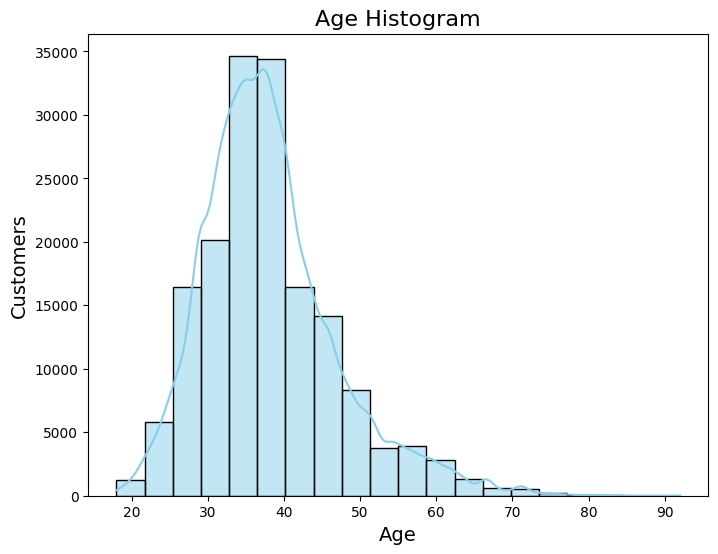

In [5]:
# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(data=original_data, x='Age', bins=20, kde=True, color='skyblue', edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Age Histogram', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Customers', fontsize=14)

# 그래프 보여주기
plt.show()

# preprocessing: Age Grouping

In [6]:
from preprocessing import get_age_group

In [7]:
original_data["AgeGroup"] = original_data["Age"].apply(get_age_group)

In [8]:
original_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,4
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,3
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1,3
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,3
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,3
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0,4
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0,4


In [9]:
original_data["AgeGroup"].describe()

count    165034.000000
mean          3.357157
std           0.936131
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: AgeGroup, dtype: float64

In [10]:
original_data["AgeGroup"].unique()

array([3, 4, 2, 7, 5, 6, 1, 8, 9])

In [11]:
original_data.groupby("AgeGroup")["id"].count()

AgeGroup
1      332
2    23202
3    81253
4    43319
5    12186
6     3920
7      763
8       48
9       11
Name: id, dtype: int64

([<matplotlib.axis.YTick at 0x17f813130>,
 [Text(0, 0, '0'),
  Text(0, 5000, '5000'),
  Text(0, 10000, '10000'),
  Text(0, 15000, '15000'),
  Text(0, 20000, '20000'),
  Text(0, 25000, '25000'),
  Text(0, 30000, '30000'),
  Text(0, 35000, '35000'),
  Text(0, 40000, '40000'),
  Text(0, 45000, '45000'),
  Text(0, 50000, '50000'),
  Text(0, 55000, '55000'),
  Text(0, 60000, '60000'),
  Text(0, 65000, '65000'),
  Text(0, 70000, '70000'),
  Text(0, 75000, '75000'),
  Text(0, 80000, '80000'),
  Text(0, 85000, '85000')])

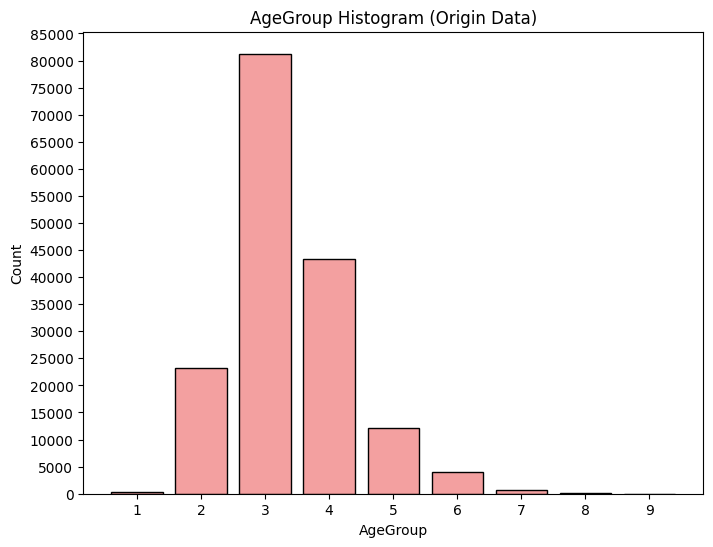

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(data=original_data, x="AgeGroup", bins=9, discrete=True, shrink=0.8, color="lightcoral")
plt.title("AgeGroup Histogram (Origin Data)")
plt.xticks(range(1, 10))
plt.yticks(range(0, 90000, 5000))


# split France and Spain

## France

In [19]:
france_data = original_data[original_data["Geography"] == "France"]
france_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,4
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,3


## Spain

In [20]:
spain_data = original_data[original_data["Geography"] == "Spain"]
spain_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,3
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,3
12,12,15717962,Rossi,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0,7
20,20,15781496,Udegbulam,773,Spain,Male,35.0,9,0.00,2,0.0,1.0,87549.36,0,3
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,3


# Age Histogram for Each Country

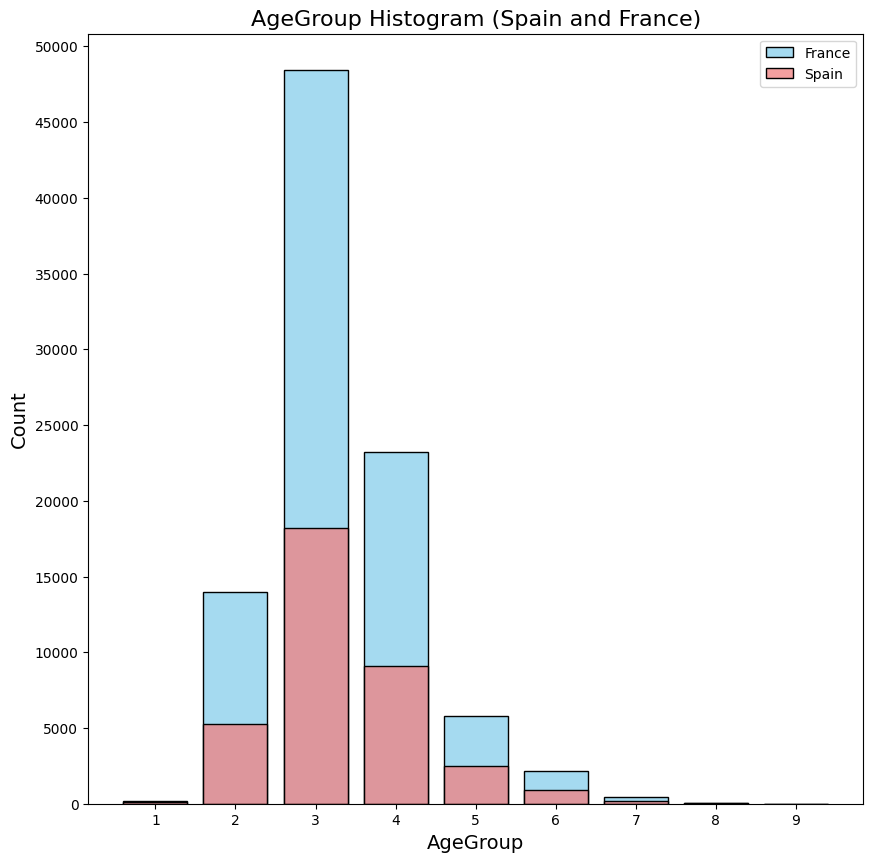

In [39]:
# 히스토그램 그리기
plt.figure(figsize=(10, 10))

sns.histplot(data=france_data, x="AgeGroup", bins=9, discrete=True, shrink=0.8, color="skyblue" , label="France")
sns.histplot(data=spain_data, x="AgeGroup", bins=9, discrete=True, shrink=0.8, color="lightcoral", label="Spain")

# plt.title("AgeGroup Histogram (Origin Data)")
plt.xticks(range(1, 10))
plt.yticks(range(0, 50001, 5000))

# 그래프 제목과 축 레이블 설정
plt.title('AgeGroup Histogram (Spain and France)', fontsize=16)
plt.xlabel('AgeGroup', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend()

plt.show()

In [40]:
spain_data.to_csv("./data/train_spain.csv", index=False)

In [41]:
france_data.to_csv("./data/train_france.csv", index=False)

# Number of Customers Exited: France

# Number of Customers Exited: Spain